In [2]:

from src import Landscaper, InfoReader, VoronoiCell, Scatter, IsoSurf, TopoCreater
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np


In [4]:
np.int32([1,2,3.5])

array([1, 2, 3])

## 拓扑结构

format: id(count_id)
0(0)-1(1)
0(0)-1(2)
0(0)-1(3)
0(0)-1(4)
0(0)-1(5)
1(5)-2(6)
2(6)-3(11)
1(4)-2(7)
2(7)-3(12)
1(3)-2(8)
2(8)-3(13)
1(2)-2(9)
2(9)-3(14)
1(1)-2(10)
2(10)-3(15)


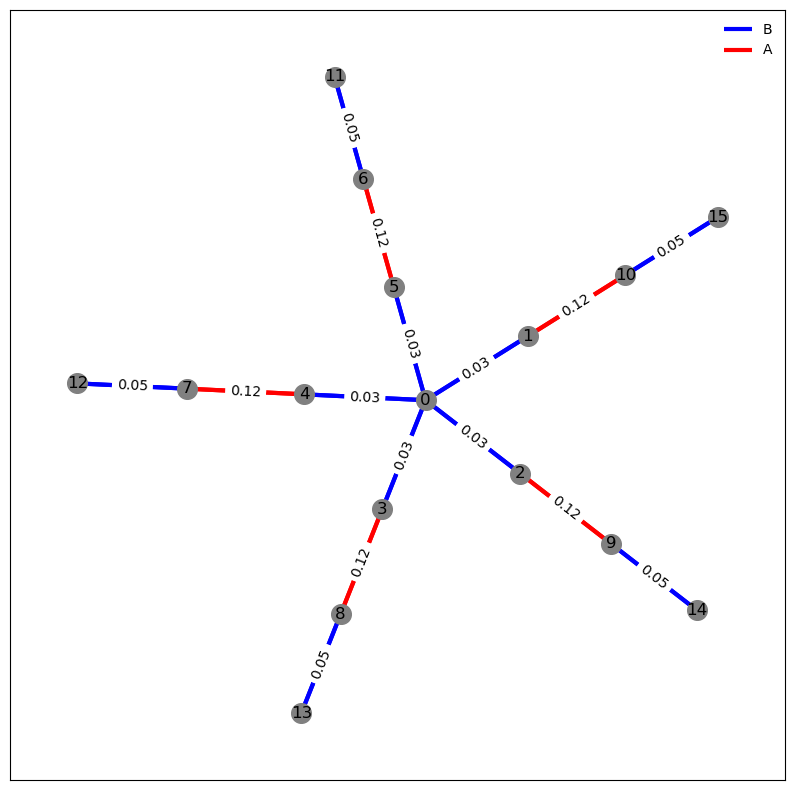

ODT is 79.35398092239298


In [17]:
tc = TopoCreater()
tc.fromJson('../datasets/Topo/input_star.json')
tc.show_topo(colorlist=['b','r'])
tc.RPA()
tc.ODT()

## 散射图

File ../datasets/scatter/joint.txt not found


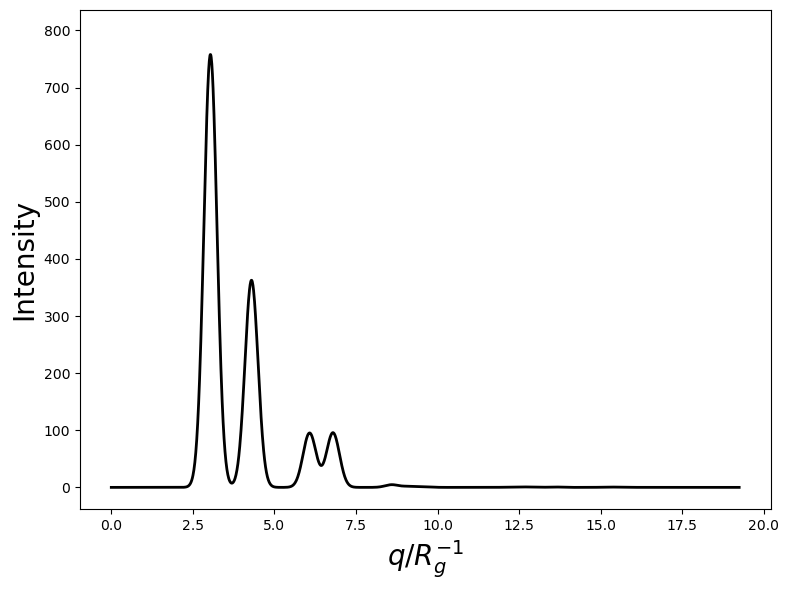

[1.         1.41139241 1.99683544 2.23417722 2.82911392]


In [14]:
s = Scatter('../datasets/scatter/', inverse_flag=True)
s.collect()
s.sacttering_peak(s.phi0, cutoff=300)
x = s.PeakShow(w=0.2, cutoff=300)
print(x)

## 二维结构图

File ../datasets/scatter\joint.txt not found


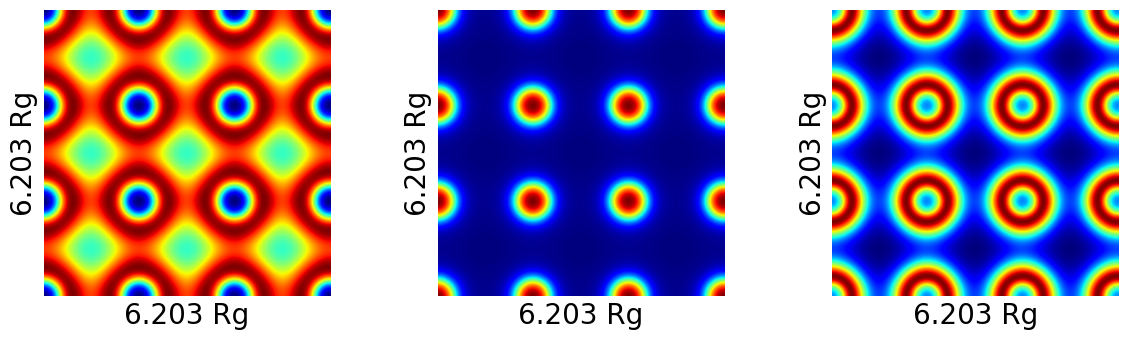

In [10]:
phi2d = IsoSurf('../datasets/scatter')
phi2d.collect()
phi2d.iso2D(['block0', 'block1', 'block2'])

## 自由能景观图

极小值点: ly: 2.051041, lz:2.051041, freeE: 11.68579359
free energy mat shape: (121, 121)
level:  0.001 面积： 0.06137515901403393 周长： 1.330240638309082 IQ:  0.435855039600947
level:  0.01 面积： 0.41225182669873345 周长： 2.8725683813453373 IQ:  0.6278150190956073


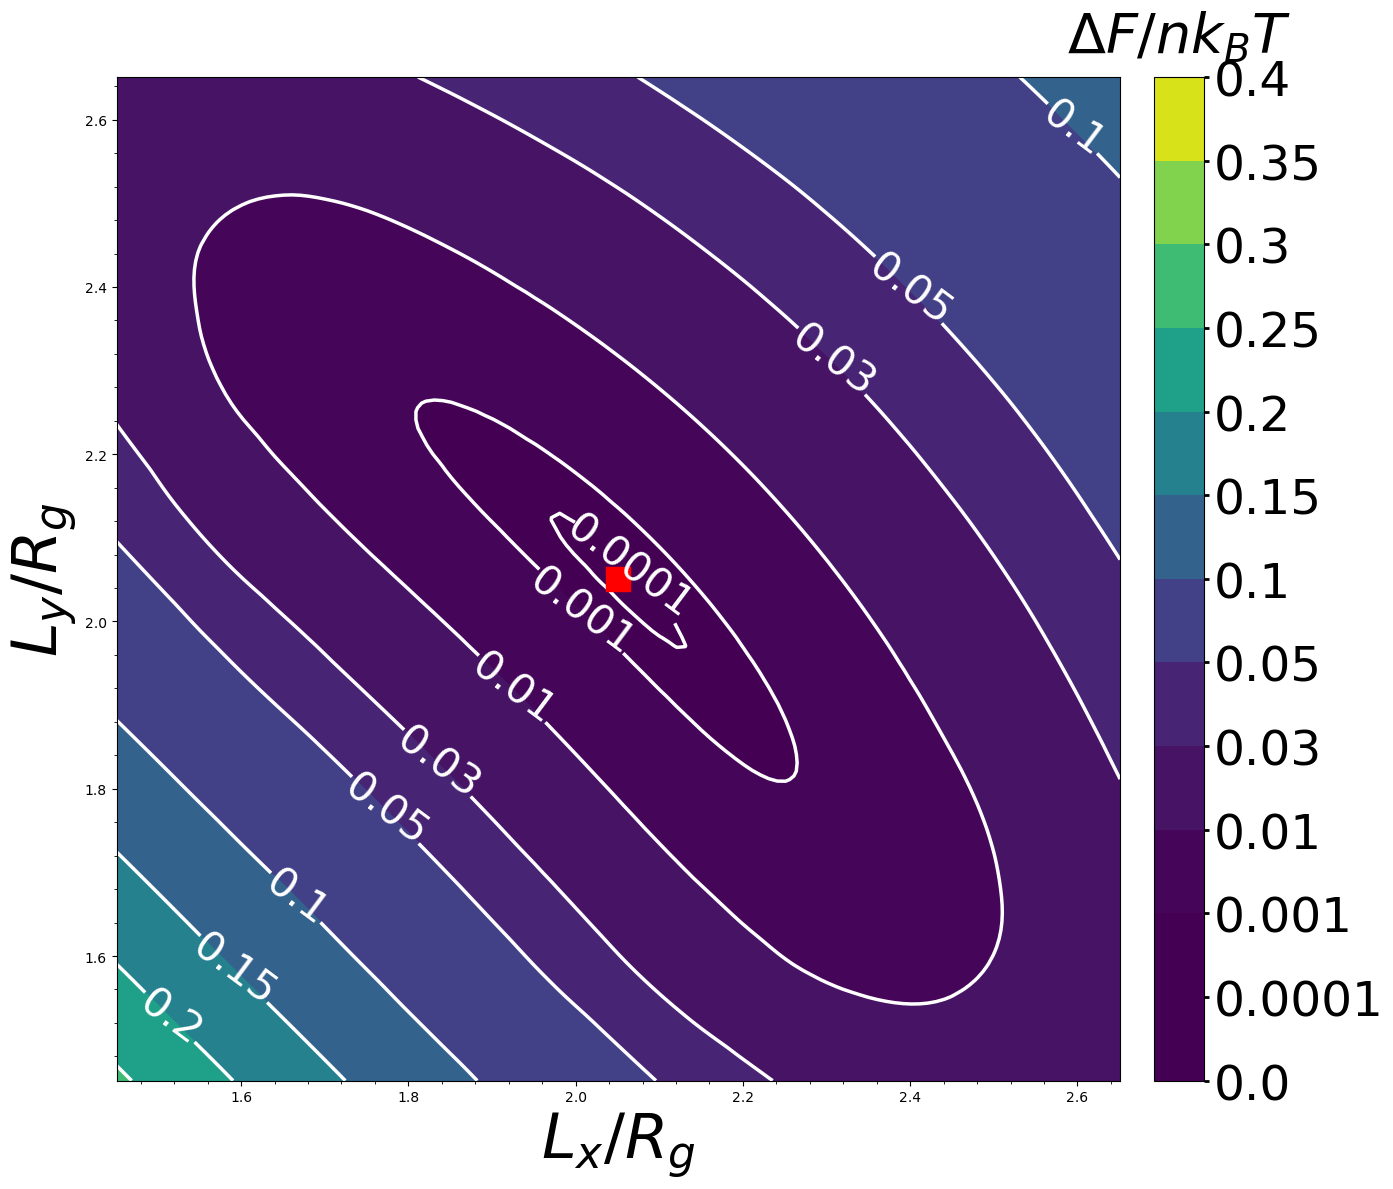

In [4]:
land = Landscaper(path='../datasets/Land/interp.csv')
land.read()
land.prospect(
    levels=[0, 0.0001, 0.001, 0.01, 0.03, 0.05,
            0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4],
    precision=-4,
    asp='square',
    xminor=5,
    yminor=5,
    clbacc=4,
    figsize=(16, 12),
    point_list=[
        [2.05104063, 2.05104063, 's', 'r', 300]
    ],
    manual=[
        (1.5, 1.5),
        (1.6,1.6),
        (1.66,1.66),
        (1.77,1.77),
        (1.84,1.84),
        (1.93,1.93),
        (2, 2),
        (2.06,2.06),
        (2.3,2.3),
        (2.4,2.4),
        (2.6,2.6),
    ]
    )


## Voronoi Cell

File ../datasets/Vori/block.txt not found
File ../datasets/Vori/joint.txt not found


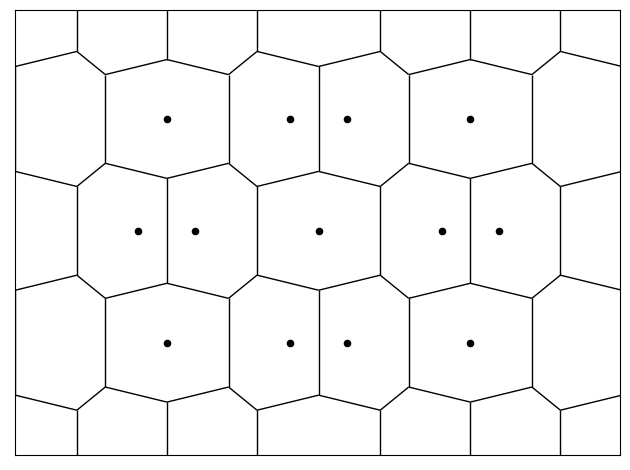

In [8]:
vc = VoronoiCell('../datasets/Vori/')
vc.collect()
vc.Voronoi(vc.phi0[1, :, :])

100%|██████████| 250000/250000 [00:03<00:00, 68926.30it/s]


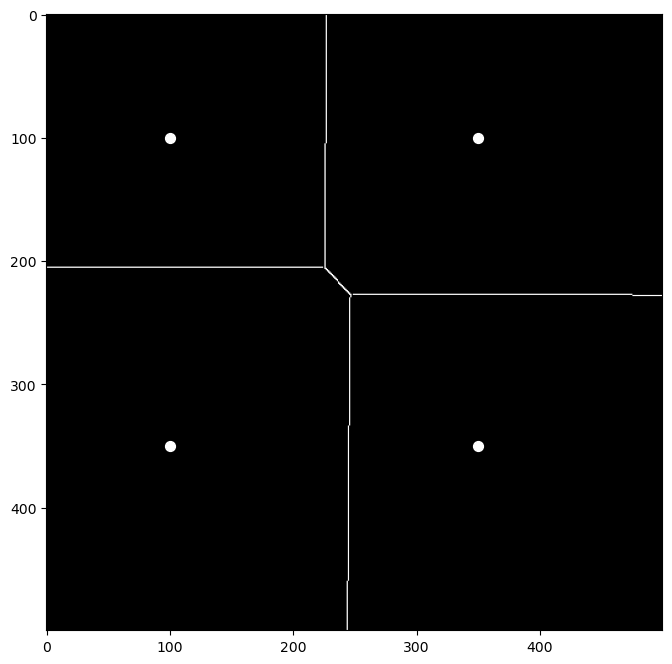

In [19]:
vc = VoronoiCell()
image = vc.weighted_voronoi_diagrams([[100,350],[100,100],[350,350],[350,100]],
                                        weights=[1e4,0,0,0],
                                        plot='vertices',
                                        method='power'
                                        )